In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import yfinance as yf
import math


In [96]:
spy_df = yf.download('SPY')['Adj Close']
spy_df = spy_df.reset_index()
spy_df_a = spy_df[(spy_df['Date'] > '2020-02-18') & (spy_df['Date'] < '2020-04-08')]['Adj Close'] # COVID
spy_df_b = spy_df[(spy_df['Date'] > '2007-07-25') & (spy_df['Date'] < '2009-03-24')]['Adj Close'] # HOUSING
spy_df_c = spy_df[(spy_df['Date'] > '2000-05-22') & (spy_df['Date'] < '2002-09-30')]['Adj Close'] # DOTCOM



[*********************100%***********************]  1 of 1 completed


In [38]:
def get_var(df,window_size,alpha):
    rets = [df.iloc[i+window_size]/df.iloc[i]-1 for i in range(len(df)- window_size)]
    return np.percentile(rets,alpha*100)

def get_sigma(df):
    rets = [df.iloc[i+1]/df.iloc[i]-1 for i in range(len(df)-1)]
    return np.std(rets)

In [75]:
window_size = 1
alpha = 0.01
sigma = get_sigma(spy_df)

x = range(1,500)
y_emp = [get_var(spy_df,window_size,alpha) for window_size in x ]
y_theo = [math.exp((sigma * i ** 0.5 * -1.96))-1 for i in x]


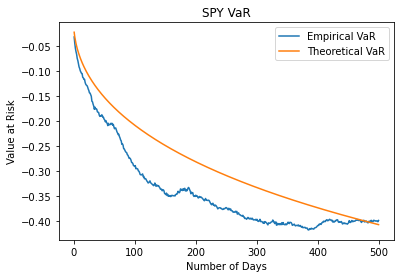

In [76]:
graph = plt.plot(x,y_emp,label = "Empirical VaR")
graph2 = plt.plot(x,y_theo, label = "Theoretical VaR")
xlab = plt.xlabel("Number of Days")
ylab = plt.ylabel("Value at Risk")
legend = plt.legend()
title = plt.title("SPY VaR")

In [111]:
window_size = 1
alpha = 0.01
sigma = get_sigma(spy_df_a)

x = range(1,30)
y_emp = [get_var(spy_df_a,window_size,alpha) for window_size in x ]
y_theo = [math.exp((sigma * i ** 0.5 * -1.96))-1 for i in x]


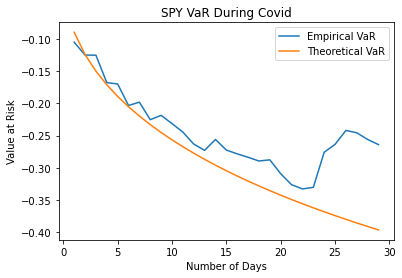

In [113]:
graph = plt.plot(x,y_emp,label = "Empirical VaR")
graph2 = plt.plot(x,y_theo, label = "Theoretical VaR")
xlab = plt.xlabel("Number of Days")
ylab = plt.ylabel("Value at Risk")
legend = plt.legend()
title = plt.title("SPY VaR During Covid")